# AVPP: Automated Visual Pollution Prediction Framework Based on a Deep Active Learning Approach Using Public Road Images
Visual pollution (VP) is the deterioration or disruption of natural and man-made landscapes that ruins the aesthetic appeal of an area.

### Overview
The goal of my project is to use Convolutional Neural Networks on Visual pollution images, found in the dataset linked below, to determine which samples are related to this pollution.

The purpose of this study is to create a new field of automated visual pollutant classification, harnessing the technological prowess of the 21st century for applications in environmental management. 

Additionally this will be useful for the development of a "visual pollution score/index" for urban
areas that might produce a new "metric" or "indicator" in the discipline of urban environmental
management.

Dataset : https://drive.google.com/file/d/1ULqYtd9yomeGz53WBhgRdPRFB37ppeDU/view?usp=sharing

### Content

- Load Dataset
- Dataset Information
- Exploring Data
- Visualize Data
- Preparing and preprocessing Data
- Modelling (EfficientNet,YOLO,R-CNN)
- Prediction
- Evaluation

### Dataset Information

A Dataset folder contains images (9966) and train.csv,test.csv files. 
- We have total 9966 images in our dataset
- in training file total 19950 duplicate images_path but with different cordinates.
- total uniquly identify : 7874 + 12076 = 19950
- in testing file 2092 images.
- total images : 7874(train) + 2092(test) = 9966

### Environment
- conda
- python 3.9
- Tensorflow
- Keras
- opencv
- Numpy
- Pandas
- Matplotlib
- Scikit-learn

### Importing required libraries

In [11]:
import pandas as pd # working with dataframes and csvs
import numpy as np # array and linear algebra
import tensorflow as tf # for modelling and image preprocessing
import os # for operating system
import cv2 # image reading
import matplotlib.pyplot as plt # for plotting and visualization
import pickle
from sklearn.model_selection import train_test_split # for splitting data into training and testing
import seaborn as sns

In [12]:
# Some constants
BATCH_SIZE = 32
IMG_SIZE = 512
NUM_CLASSES = 11

In [13]:
DATA_DIR = 'dataset'
df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

# adding absolute path
df['image_path'] = "dataset/images/" + df['image_path']
test_df['image_path'] = "dataset/images/" + test_df['image_path']
df.head()

,class,image_path,name,xmax,xmin,ymax,ymin
0,3.0,dataset/images/4a48c42c9579ec0399e6c5a3e825e76...,GARBAGE,797.0,701.0,262.0,211.0
1,3.0,dataset/images/4a48c42c9579ec0399e6c5a3e825e76...,GARBAGE,932.0,786.0,329.0,238.0
2,3.0,dataset/images/4a48c42c9579ec0399e6c5a3e825e76...,GARBAGE,736.0,657.0,275.0,229.0
3,7.0,dataset/images/ea906a663da6321bcef78be4b7d1aff...,BAD_BILLBOARD,986.0,786.0,136.0,0.0
4,8.0,dataset/images/1c7d48005a12d1b19261b8e71df7caf...,SAND_ON_ROAD,667.0,549.0,228.0,179.0


## Visualize and gather information from dataset


In [14]:
print(f"Dataset shape is: {df.shape}")
print(f"Length of dataset is:{len(df)}")

Dataset shape is: (19950, 7)
Length of dataset is:19950


In [15]:
df.describe()

,class,xmax,xmin,ymax,ymin
count,19950.000000,19950.000000,19950.000000,19950.000000,19950.000000
mean,4.055388,572.813634,362.418647,314.202506,201.514937
std,2.502491,264.445257,264.246281,102.133871,85.536614
min,0.000000,30.000000,-397.000000,20.000000,-150.000000
25%,3.000000,357.000000,147.000000,242.000000,149.000000
50%,3.000000,567.000000,350.000000,296.000000,195.000000
75%,4.000000,789.000000,581.000000,372.000000,251.000000
max,10.000000,1384.000000,935.000000,698.000000,500.000000


In [16]:
# we have 11 classes 
class_names = df.groupby('class')['name'].apply(lambda x: np.unique(x))
class_names

class
0.0              [GRAFFITI]
1.0         [FADED_SIGNAGE]
2.0              [POTHOLES]
3.0               [GARBAGE]
4.0     [CONSTRUCTION_ROAD]
5.0        [BROKEN_SIGNAGE]
6.0       [BAD_STREETLIGHT]
7.0         [BAD_BILLBOARD]
8.0          [SAND_ON_ROAD]
9.0      [CLUTTER_SIDEWALK]
10.0        [UNKEPT_FACADE]
Name: name, dtype: object

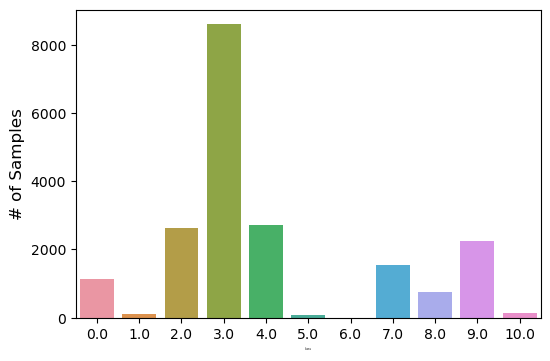

In [17]:
# count images of each columns
plt.figure(figsize=(6,4))
ax = sns.countplot(x='class', data=df)
plt.xlabel("class", fontsize= 2)
plt.ylabel("# of Samples", fontsize= 12)
plt.show()

**Note** : In this plot we are using training.csv file that are contains duplicates image path so count is showing high then the original image dataset

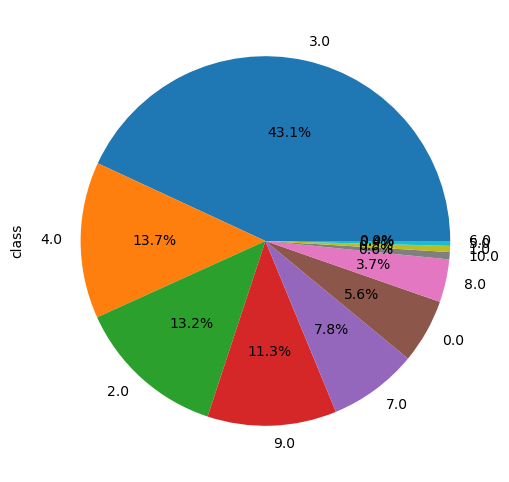

In [18]:
plt.figure(figsize=(6,6))
df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops = {"fontsize":10})
# plt.legend(labels=class_names)
plt.show()

Train Set


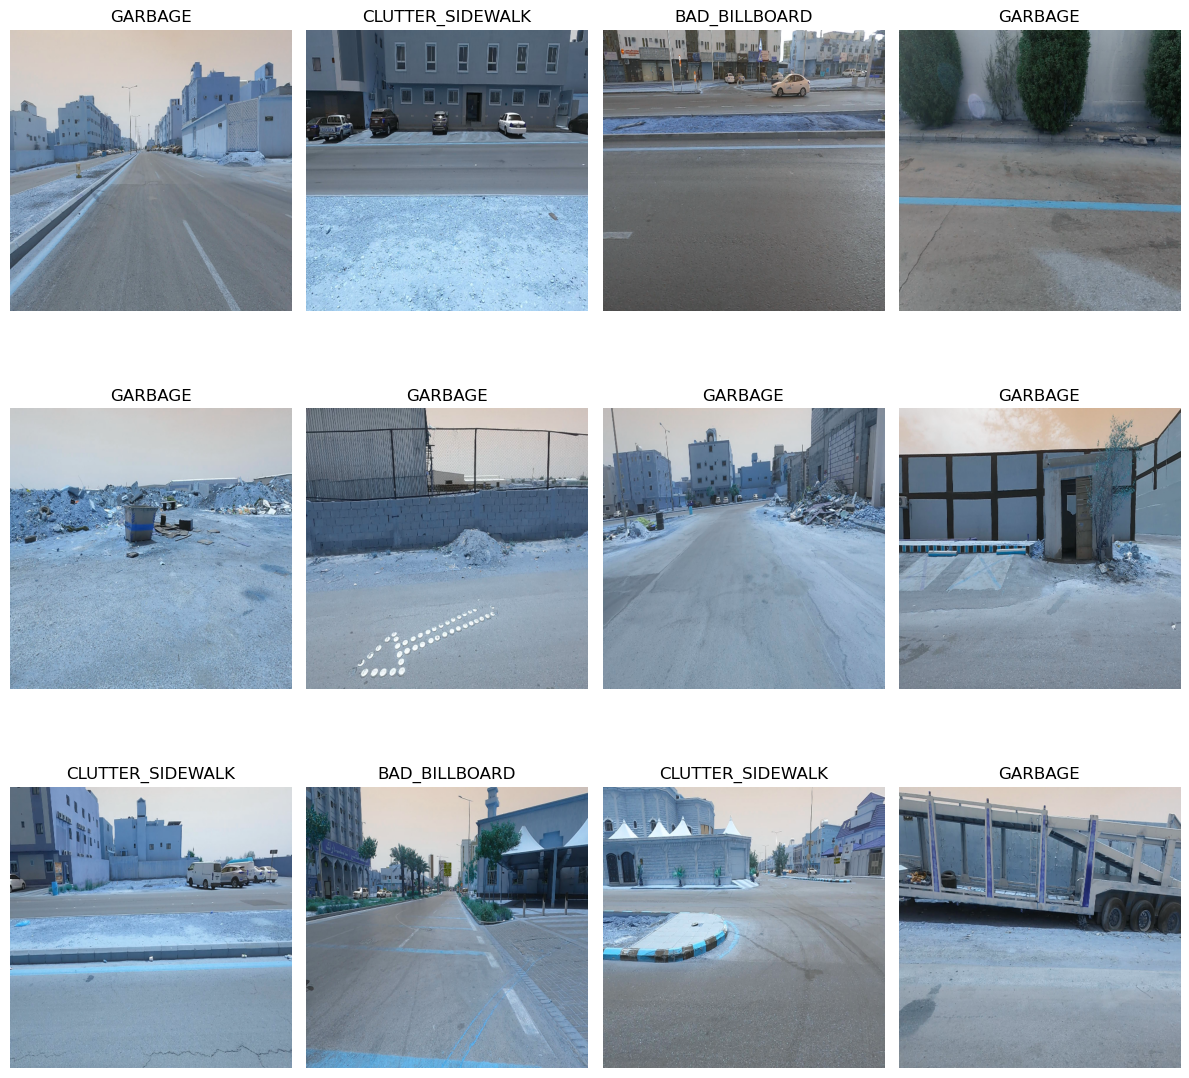

In [19]:
print('Train Set')
plt.figure(figsize=(12,12))
for i in range(0, 12):
    ind = np.random.randint(0,1000)
    plt.subplot(3,4,i + 1)
    img = cv2.imread(df['image_path'].iloc[ind])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.title(df['name'].iloc[ind])
    plt.axis("off")

plt.tight_layout()

plt.show()

In [20]:
# save our dataframe for future use
flag = True
if flag: 
  with open('pickled_df.pkl', 'wb') as f: pickle.dump(df, f)
  with open('pickled_test_df.pkl', 'wb') as f: pickle.dump(test_df, f)
  print('File Saved')

File Saved


In [21]:
with open('pickled_df.pkl', 'rb') as f: df = pickle.load(f)
with open('pickled_test_df.pkl', 'rb') as f: test_df = pickle.load(f)


In [22]:
train_df,val_df = train_test_split(df,test_size=0.1,random_state=123,shuffle=True)
train_df.shape,val_df.shape
train_df.head(5)

,class,image_path,name,xmax,xmin,ymax,ymin
827,9.0,dataset/images/e3f24cd8f5eed952a77c3fb88b7600b...,CLUTTER_SIDEWALK,212.0,13.0,284.0,203.0
17779,9.0,dataset/images/a43ad666c3c2497ecf462971d77463b...,CLUTTER_SIDEWALK,143.0,-30.0,328.0,237.0
9501,1.0,dataset/images/35df260224baa507a0b3e5e98169506...,FADED_SIGNAGE,801.0,706.0,371.0,146.0
15797,3.0,dataset/images/98505e19dc284a1f1955c62150d4d59...,GARBAGE,950.0,846.0,227.0,178.0
13789,3.0,dataset/images/d3af748e17839986022ab6c4c1ac1cc...,GARBAGE,800.0,728.0,367.0,316.0


In [23]:
image_paths = train_df['image_path'].tolist()
class_lables = train_df['class'].values
bbox = train_df[['xmin','xmax','ymin','ymax']].values

In [24]:
def preprocess_img(image,label):
    image = tf.image.decode_jpeg(image, channels=3)
    (class_name,bbox) = label
    width = tf.cast(tf.shape(image)[1], tf.float64)
    height = tf.cast(tf.shape(image)[0], tf.float64)
    bbox = tf.stack([bbox[0]/width, bbox[1]/width, bbox[2]/height, bbox[3]/height], axis=-1)
    image = tf.image.resize(image, (224, 224))
    image /= 255.0
    return image,(class_name,bbox)

def load_and_preprocess_image(path,label):
    image = tf.io.read_file(path)
    return preprocess_img(image,label)

In [25]:
import tensorflow as tf
import cv2
import numpy as np
tf.__version__

'2.10.0'

In [36]:
new_model = tf.keras.models.load_model('models/model.h5')
def predict_image(image):
    img = cv2.imread(image)
    img = tf.image.resize(img, (224, 224))
    img = img / 255.0
    img = np.expand_dims(img,axis=0)
    pred = new_model.predict(img)
    class_name = class_names[np.argmax(pred[0])]
    bbox = pred[1]
    confidence = round(100 * (np.max(pred[0])),2)
    (xmin,xmax,ymin,ymax) = bbox[0][0] * 1920,bbox[0][1] * 1920, bbox[0][2] * 1080 ,bbox[0][3] * 1080
    bboxes = [xmin,xmax,ymin,ymax]
    return class_name,bboxes,confidence

In [40]:
classname,bbox,conf = predict_image('dataset/images/0a4e0e88a05abd96670c8c0c3a67fc73.jpg')
conf,classname[0],bbox

1/1 [==============================] - 0s 140ms/step


(88.02,
 'GARBAGE',
 [303.385534286499, 532.474479675293, 255.9519249200821, 354.1493082046509])